In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer

In [84]:
(X_treinamento, _), (X_teste, _) = cifar10.load_data()

In [85]:
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [86]:
X_treinamento.shape, X_teste.shape

((50000, 3072), (10000, 3072))

In [87]:
autoencoder = Sequential()
# Codificador
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=768, activation='relu'))
autoencoder.add(Dense(units=384, activation='relu'))  # Codificação final

# Decodificador
autoencoder.add(Dense(units=768, activation='relu'))
autoencoder.add(Dense(units=1536, activation='relu'))
autoencoder.add(Dense(units=3072, activation='sigmoid'))  # Saída reconstruída


In [88]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=10, batch_size=256,
                validation_data=(X_teste, X_teste))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 214ms/step - accuracy: 0.0013 - loss: 0.6645 - val_accuracy: 0.0022 - val_loss: 0.6186
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.0029 - loss: 0.6097 - val_accuracy: 0.0038 - val_loss: 0.6042
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.0034 - loss: 0.6003 - val_accuracy: 0.0051 - val_loss: 0.5973
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.0035 - loss: 0.5959 - val_accuracy: 0.0048 - val_loss: 0.5913
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.0050 - loss: 0.5897 - val_accuracy: 0.0041 - val_loss: 0.5902
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.0054 - loss: 0.5881 - val_accuracy: 0.0057 - val_loss: 0.5871
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.0066 - loss: 0.5853 - val_accuracy: 0.0055 - val_loss: 0.5866
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 181ms/step - accuracy: 0.0061 - loss: 0

In [90]:
from tensorflow.keras.layers import Input

dimensao_original = Input(shape=(3072,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
encoder = Model(dimensao_original, camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))
encoder.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1536)           │     4,720,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 768)            │     1,180,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 384)            │       295,296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,195,840 (23.64 MB)

 Trainable params: 6,195,840 (23.64 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [92]:
imagens_codificadas.shape

(10000, 384)

In [93]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [94]:
imagens_decodificadas.shape

(10000, 3072)

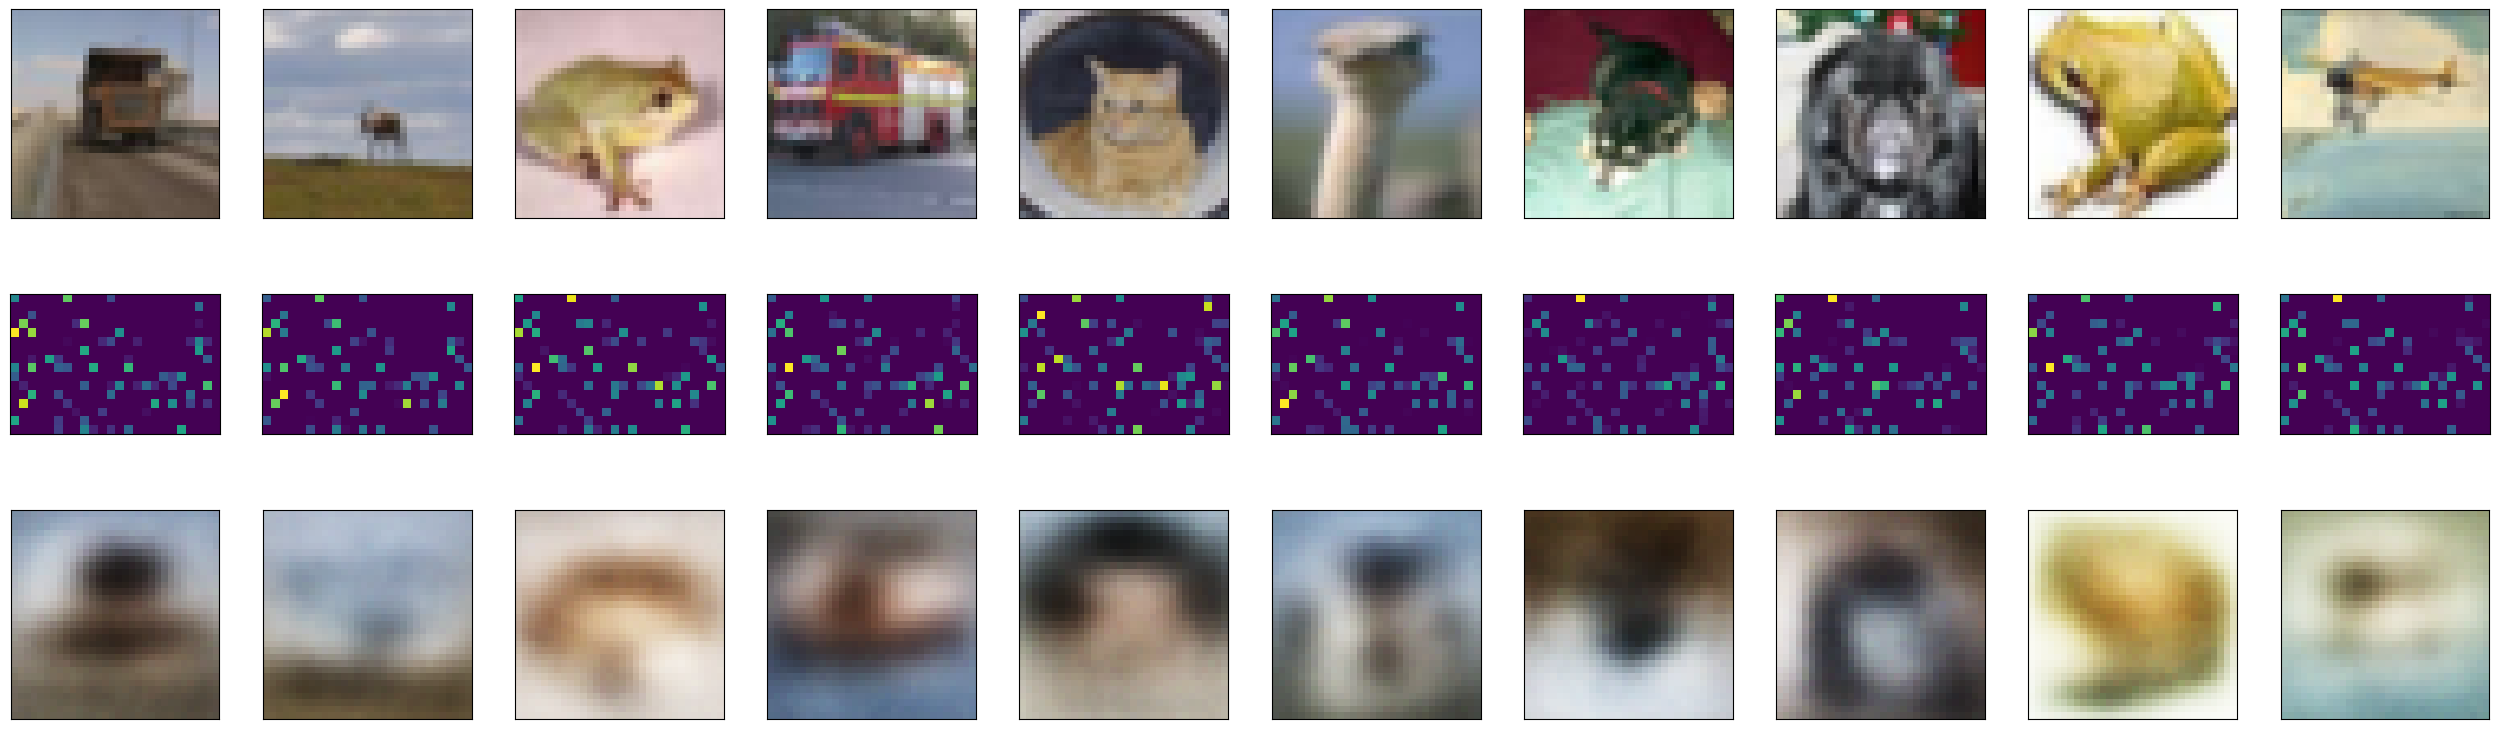

In [97]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(32,32))

for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())

    # Imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 24))  # Ajuste o reshape conforme a codificação
    plt.xticks(())
    plt.yticks(())

    # Imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())

plt.show()